In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# About data set
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

Attribute Information
1) age

2) sex (1 = male; 0 = female) 

3) chest pain type (4 values)

4) resting blood pressure

5) serum cholestoral in mg/dl

6)fasting blood sugar > 120 mg/dl

7) resting electrocardiographic results (values 0,1,2)

8) maximum heart rate achieved

9) exercise induced angina

10) oldpeak = ST depression induced by exercise relative to rest

11)the slope of the peak exercise ST segment

12) number of major vessels (0-3) colored by flourosopy

13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14) target: 0= less chance of heart attack 1= more chance of heart attack

In [2]:
dado = pd.read_csv('DADOS/heart.csv')
dado.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1


In [3]:
colunas_traducao = {
'age' : 'idade',
'sex' : 'sexo'  ,     
'cp' : 'tp_dor_tox'   ,
'trestbps' : 'pres_arterial'          ,
'chol' : 'colestoral_sérico'         ,      
'fbs' : 'glicemia_jejum',    
'restecg' : 'result_eletrocardio'   ,
'thalach' : 'frequ_card_max'            ,
'exang' : 'angina_induzida',
'oldpeak' : 'pico_antigo'  ,
'slope' : 'incli_seg_ST'      ,
'ca' : 'nu_vaso_principais',
'thal' : 'thal',
'target' :  'target'
}

In [4]:
dado = dado.rename(columns = colunas_traducao)

In [5]:
dado.sample(5)

,idade,sexo,tp_dor_tox,pres_arterial,colestoral_sérico,glicemia_jejum,result_eletrocardio,frequ_card_max,angina_induzida,pico_antigo,incli_seg_ST,nu_vaso_principais,thal,target
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


# QUAL SEXO TEM MAIOR CHANCE DE TER ?

In [6]:
# Transforma sexo em categorico
dado['sexo'] = dado['sexo'].astype('category')


In [7]:
modelo = smf.glm(formula='target ~ sexo + idade + thal + nu_vaso_principais + tp_dor_tox', data=dado,
                family = sm.families.Binomial()).fit()
print(modelo.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  303
Model:                            GLM   Df Residuals:                      297
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -136.15
Date:                Tue, 19 Jul 2022   Deviance:                       272.31
Time:                        18:31:08   Pearson chi2:                     306.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.8638      1

A função glm() ajusta-se aos modelos lineares generalizados, uma classe de modelos que inclui regressão logística. A sintaxe da função glm() é semelhante à de lm(), exceto que devemos passar o argumento family=sm.families.Binomial() para dizer ao python para executar uma regressão logística em vez de algum outro tipo de modelo linear generalizado.

In [8]:
print(np.exp(modelo.params[1:])) # a probabilidade de ser/fazer sobre a de não ser/fazer- qq valor abaixo de 1 diminui a chance de ser/ fazer acima de 1 aumenta

sexo[T.1]             0.234045
idade                 0.949347
thal                  0.383594
nu_vaso_principais    0.500154
tp_dor_tox            2.639195
dtype: float64


interpretando os dados : homens possuem 0.23 chance de terem ataque  do coração

    para cada ano a mais o individuo tem 0.94 chance que outro individuo com um ano a menos

In [9]:
(np.exp(modelo.params[1:]) / (np.exp(modelo.params[1:]) +1 )) * 100  #probabilidade de fazer apenas


sexo[T.1]             18.965699
idade                 48.700780
thal                  27.724447
nu_vaso_principais    33.340161
tp_dor_tox            72.521399
dtype: float64

Podemos também gerar os mesmos dados em percentuais relativos de chances para compará-los e obter uma interpretação parecida com a interpretação da regressão linear, mas em termos de chances.



Homens possuem 76 % menos chance do que mulheres de terem um ataque do coração
Para cada ano a mais de idade, as chances diminuem 5.06%.

# utilizando scikit-learn 

In [10]:
X = dado[['idade','sexo','tp_dor_tox','pres_arterial','colestoral_sérico','glicemia_jejum',    
'result_eletrocardio'   ,
'frequ_card_max'            ,
'angina_induzida',
'pico_antigo'  ,
'incli_seg_ST'      ,
 'nu_vaso_principais',
 'thal']]
Y= dado.target# Criando conjunto de treino e teste


In [11]:
model = LogisticRegression(penalty='none', solver='newton-cg')
model.fit(X,Y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
dado.corr()

,idade,tp_dor_tox,pres_arterial,colestoral_sérico,glicemia_jejum,result_eletrocardio,frequ_card_max,angina_induzida,pico_antigo,incli_seg_ST,nu_vaso_principais,thal,target
idade,1.000000,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
tp_dor_tox,-0.068653,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
pres_arterial,0.279351,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
colestoral_sérico,0.213678,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
glicemia_jejum,0.121308,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
result_eletrocardio,-0.116211,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
frequ_card_max,-0.398522,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
angina_induzida,0.096801,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
pico_antigo,0.210013,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
incli_seg_ST,-0.168814,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877


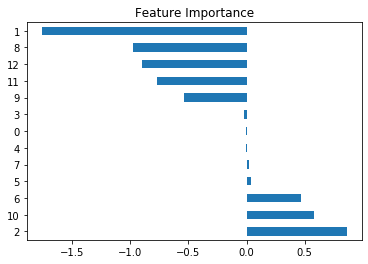

In [13]:
importance = model.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

In [14]:
dado

,idade,sexo,tp_dor_tox,pres_arterial,colestoral_sérico,glicemia_jejum,result_eletrocardio,frequ_card_max,angina_induzida,pico_antigo,incli_seg_ST,nu_vaso_principais,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


* Um coeficiente de regressão descreve o tamanho e a direção da relação entre um preditor e a variável de resposta. Coeficientes são os números pelos quais os valores do termo são multiplicados em uma equação de regressão. 

In [15]:
model = LogisticRegression(penalty='none', solver='newton-cg')
baseline_df = dado[['target', 'tp_dor_tox','result_eletrocardio','incli_seg_ST']].dropna()
Y = baseline_df.target
X = pd.get_dummies(baseline_df[['tp_dor_tox','result_eletrocardio','incli_seg_ST']], drop_first=True)
print(X)

     tp_dor_tox  result_eletrocardio  incli_seg_ST
0             3                    0             0
1             2                    1             0
2             1                    0             2
3             1                    1             2
4             0                    1             2
..          ...                  ...           ...
298           0                    1             1
299           3                    1             1
300           0                    1             1
301           0                    1             1
302           1                    0             1

[303 rows x 3 columns]


In [16]:
model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
print(model.coef_) # Temos o mesmo modelo!

[[0.97376767 0.46618504 1.22177277]]


In [18]:
# Predizendo as probabilidades
yhat = model.predict_proba(X)

In [19]:
yhat = yhat[:, 1] # manter somente para a classe positiva

In [20]:
confusion_matrix(Y, model.predict(X)) # usando a função do sklearn

array([[ 98,  40],
       [ 35, 130]], dtype=int64)

In [21]:
pd.crosstab(Y, model.predict(X))  # fazendo "na mão"

col_0,0,1
target,,
0,98,40
1,35,130


In [22]:
acuracia = accuracy_score(Y, model.predict(X))
print('O modelo obteve %0.4f de acurácia.' % acuracia)

O modelo obteve 0.7525 de acurácia.


testando com variaveis de correlação(importância) negativa

In [23]:
model = LogisticRegression(penalty='none', solver='newton-cg')
baseline_df = dado[['target', 'sexo','angina_induzida','thal','nu_vaso_principais','pico_antigo']].dropna()
Y = baseline_df.target
X = pd.get_dummies(baseline_df[['sexo','angina_induzida','thal','nu_vaso_principais','pico_antigo']], drop_first=True)
print(X)

     angina_induzida  thal  nu_vaso_principais  pico_antigo  sexo_1
0                  0     1                   0          2.3       1
1                  0     2                   0          3.5       1
2                  0     2                   0          1.4       0
3                  0     2                   0          0.8       1
4                  1     2                   0          0.6       0
..               ...   ...                 ...          ...     ...
298                1     3                   0          0.2       0
299                0     3                   0          1.2       1
300                0     3                   2          3.4       1
301                1     3                   1          1.2       1
302                0     2                   1          0.0       0

[303 rows x 5 columns]


In [24]:
model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# Predizendo as probabilidades
yhat = model.predict_proba(X)

In [26]:
yhat = yhat[:, 1] # manter somente para a classe positiva

In [27]:
confusion_matrix(Y, model.predict(X)) # usando a função do sklearn

array([[102,  36],
       [ 26, 139]], dtype=int64)

In [28]:
acuracia = accuracy_score(Y, model.predict(X))
print('O modelo obteve %0.4f de acurácia.' % acuracia)


O modelo obteve 0.7954 de acurácia.


testando com as variaveis de maior importancia seja negativas ou positivas

In [29]:
model = LogisticRegression(penalty='elasticnet', solver='saga',C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0, max_iter=100,
                   multi_class='warn', n_jobs=None,
                   random_state=None,tol=0.0001, verbose=0,
                   warm_start=False)
baseline_df = dado[['target', 'tp_dor_tox','result_eletrocardio','incli_seg_ST','sexo','angina_induzida','thal','nu_vaso_principais','pico_antigo']].dropna()
Y = baseline_df.target
X = pd.get_dummies(baseline_df[['tp_dor_tox','result_eletrocardio','incli_seg_ST','sexo','angina_induzida','thal','nu_vaso_principais','pico_antigo']], drop_first=True)
print(X)

     tp_dor_tox  result_eletrocardio  incli_seg_ST  angina_induzida  thal  \
0             3                    0             0                0     1   
1             2                    1             0                0     2   
2             1                    0             2                0     2   
3             1                    1             2                0     2   
4             0                    1             2                1     2   
..          ...                  ...           ...              ...   ...   
298           0                    1             1                1     3   
299           3                    1             1                0     3   
300           0                    1             1                0     3   
301           0                    1             1                1     3   
302           1                    0             1                0     2   

     nu_vaso_principais  pico_antigo  sexo_1  
0                     0     

In [30]:
model.fit(X, Y)

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
acuracia = accuracy_score(Y, model.predict(X))
print('O modelo obteve %0.4f de acurácia.' % acuracia)

O modelo obteve 0.8416 de acurácia.


A acurácia não é uma medida muito boa para trabalhar com modelos de classificação pois ela pode nos induzir a achar que um modelo que prediz corretamente todos os zeros mas nenhum um é um modelo muito bom. Vejamos outras alternativas de métricas mais interessantes do que a acurácia.

In [32]:
print(classification_report(Y, model.predict(X)))


              precision    recall  f1-score   support

           0       0.86      0.78      0.82       138
           1       0.83      0.90      0.86       165

    accuracy                           0.84       303
   macro avg       0.84      0.84      0.84       303
weighted avg       0.84      0.84      0.84       303



O classification report do SciKit-Learn nos provê as três métricas de avaliação apresentadas na figura acima.

Precision é a capacidade do modelo de não prever uma instância negativa como positiva (não cometer erro do tipo 1). Para todas as instância classificadas como positivas, qual é o percentual de acerto.

Recall é a capacidade do modelo de encontrar todas as instâncias positivas. Para todas as instâncias que são de fato positivas, qual é o percentual de acerto.

A métrica F1 conjuga as duas anteriores como uma média harmônica entre ambas. Ela deve sempre ser priorizada para comparar modelos de classificação em relação à acurácia.

Uma excelente alternativa é fazer a curva ROC e calcular o AUC (área debaixo da curva).

A curva ROC (Receiver Operating Characteristic Curve) leva em conta a TPR (True Positive Rate ou Recall ou Sensitity) e a FPR (False Positive Rate ou Specificity).

A curva ROC traça esses dois parâmetros. o AUC (Area Under the Curve) é um valor que sintetiza a informação da curva ROC. Ela varia de 0.5 a 1. Em suma, essa métrica nos diz o quanto o modelo é capaz de distinguir as duas classes. Vejamos o AUC e a curva RUC para o modelo que estimamos.

In [33]:
print('AUC: %0.2f' % roc_auc_score(Y, yhat))


AUC: 0.88


In [34]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


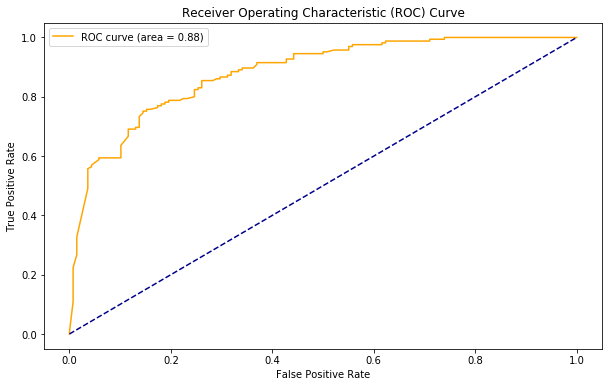

In [35]:
plot_roc_curve(Y, yhat)


Podemos considerar uma área debaixo da curva de mais de 0.7 como aceitável. Mais de 0.8 parece bom. Mais de .9 está excelente. Há também outras métricas que podemos explorar.

# Predições

In [36]:
dado.sample(5)

,idade,sexo,tp_dor_tox,pres_arterial,colestoral_sérico,glicemia_jejum,result_eletrocardio,frequ_card_max,angina_induzida,pico_antigo,incli_seg_ST,nu_vaso_principais,thal,target
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0


In [37]:
eu = pd.DataFrame({'tp_dor_tox':2,'result_eletrocardio':0,'incli_seg_ST':1,'sexo':1,'angina_induzida':1,'thal':2,'nu_vaso_principais':0,'pico_antigo':3.0}, index=[0])
minha_prob = model.predict_proba(eu)
print('Eu teria {}% de ter um ataque'\
      .format(round(minha_prob[:,1][0]*100, 2)))


Eu teria 11.03% de ter um ataque


tentar prever quem terá um ataque 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)# Treinando modelo

In [39]:
model.fit(X_train, y_train)

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
X_test[10:16]

,tp_dor_tox,result_eletrocardio,incli_seg_ST,angina_induzida,thal,nu_vaso_principais,pico_antigo,sexo_1
5,0,1,1,0,1,0,0.4,1
101,3,0,0,0,3,0,4.2,1
45,1,1,2,0,2,0,0.2,1
175,0,0,1,1,3,0,2.0,1
118,1,1,2,0,2,0,0.0,0
46,2,0,2,0,2,0,0.0,1


In [41]:
lista = []
for i in range(len(X_test)):
    minha_prob = model.predict_proba(X_test)
    prob = (minha_prob[i])
    print('Eu teria {}% de ter um ataque'\
      .format(round(prob[1:2][0]*100, 2)))

Eu teria 21.91% de ter um ataque
Eu teria 86.0% de ter um ataque
Eu teria 81.13% de ter um ataque
Eu teria 2.02% de ter um ataque
Eu teria 94.43% de ter um ataque
Eu teria 90.37% de ter um ataque
Eu teria 52.64% de ter um ataque
Eu teria 0.24% de ter um ataque
Eu teria 0.74% de ter um ataque
Eu teria 53.02% de ter um ataque
Eu teria 83.02% de ter um ataque
Eu teria 15.41% de ter um ataque
Eu teria 91.33% de ter um ataque
Eu teria 3.69% de ter um ataque
Eu teria 97.11% de ter um ataque
Eu teria 93.5% de ter um ataque
Eu teria 95.33% de ter um ataque
Eu teria 13.85% de ter um ataque
Eu teria 1.61% de ter um ataque
Eu teria 1.3% de ter um ataque
Eu teria 82.2% de ter um ataque
Eu teria 2.55% de ter um ataque
Eu teria 55.86% de ter um ataque
Eu teria 82.07% de ter um ataque
Eu teria 93.47% de ter um ataque
Eu teria 66.64% de ter um ataque
Eu teria 97.2% de ter um ataque
Eu teria 43.91% de ter um ataque
Eu teria 1.86% de ter um ataque
Eu teria 87.23% de ter um ataque
Eu teria 10.71% de ter 

In [42]:
dado[10:16]

,idade,sexo,tp_dor_tox,pres_arterial,colestoral_sérico,glicemia_jejum,result_eletrocardio,frequ_card_max,angina_induzida,pico_antigo,incli_seg_ST,nu_vaso_principais,thal,target
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1


In [43]:
dado.query(' tp_dor_tox==2 and result_eletrocardio == 0 and incli_seg_ST == 2 and angina_induzida==0 and thal == 2 and nu_vaso_principais==0 and pico_antigo==0.0 and sexo==1')

,idade,sexo,tp_dor_tox,pres_arterial,colestoral_sérico,glicemia_jejum,result_eletrocardio,frequ_card_max,angina_induzida,pico_antigo,incli_seg_ST,nu_vaso_principais,thal,target
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1


In [44]:
dado.query(' tp_dor_tox==2 and result_eletrocardio == 1 and incli_seg_ST == 2 and angina_induzida==0 and thal == 2 and nu_vaso_principais==0 and pico_antigo==1.6 and sexo==1')

,idade,sexo,tp_dor_tox,pres_arterial,colestoral_sérico,glicemia_jejum,result_eletrocardio,frequ_card_max,angina_induzida,pico_antigo,incli_seg_ST,nu_vaso_principais,thal,target
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1


http://neylsoncrepalde.github.io/2019-11-25-regressao_logistica_python/

In [45]:
def freq(x: pd.Series, plot=False):
    contagem = x.value_counts()
    percentual = round((x.value_counts() / x.shape[0]) * 100, 3)
    res = pd.DataFrame({'values': x.unique(), 'n': contagem, 'perc': percentual})
    if plot:
        sns.countplot(x)
        plt.show()
    return res


In [46]:
# Quantos sobreviveram e não sobreviveram
(dado.target.value_counts() / dado.shape[0]) * 100


1    54.455446
0    45.544554
Name: target, dtype: float64

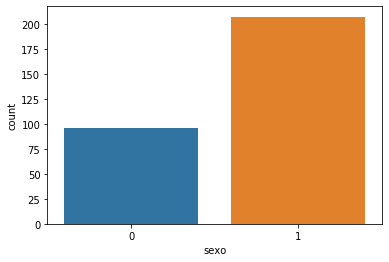

,values,n,perc
1,1,207,68.317
0,0,96,31.683


In [47]:
freq(dado.sexo, plot=True)


# escolhendo as variaveis para o modelo de Classificação

podemos tentar identificar se há correlação entre as variavéis

In [48]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns# Carregando dataset

X2 = dado[['idade','sexo','tp_dor_tox','pres_arterial','colestoral_sérico','glicemia_jejum',    
'result_eletrocardio'   ,
'frequ_card_max'            ,
'angina_induzida',
'pico_antigo'  ,
'incli_seg_ST'      ,
 'nu_vaso_principais',
 'thal']]
Y2 = dado.target# Criando conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, random_state=42)# Treinando modelo
model_randomforest  = RandomForestClassifier()
model_randomforest.fit(X_train, y_train)# Mostrando importância de cada feature
model_randomforest.feature_importances_

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.10579472, 0.02112956, 0.09091841, 0.07416961, 0.03999532,
       0.00112365, 0.01571635, 0.10349224, 0.04551444, 0.09488434,
       0.07188441, 0.2098204 , 0.12555654])

In [50]:
0.1119876 + 0.03353875+ 0.1259624 +0.05801383+ 0.09194341+0.01479495+ 0.01201865+ 0.0998143 + 0.0539836 + 0.11418677+0.05222034+ 0.17040528+0.06113012

0.9999999999999999

 Se  somar todos os elementos , verá que o resultado será 1 ou próximo de 1. Ao analisar esse array, podemos ver que a feature mais importante para o algoritmo foi a vigéssima segunda, nu_vaso_principais. Se quiser gerar uma visualização para ver as features mais importantes, o código é similar a esse:

Text(0.5, 1.0, 'Importância de cada feature')

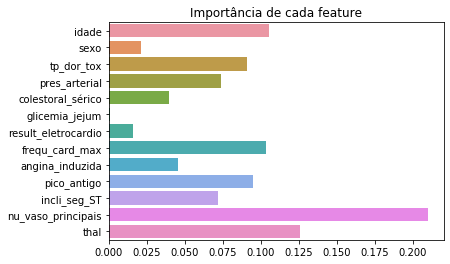

In [52]:
importances = pd.Series(data=model_randomforest.feature_importances_, index=X2.columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

Cuidado com esse método! As vezes, os valores mostrados pelo feature_importances_ pode ser enviesado dependendo dos parâmetros definidos na criação do objeto. O que isso quer dizer? Evite usar os parâmetros default do RandomForestClassifier()

SELECIONANDO FEATURES COM O KBEST
KBEST É UM TESTE ESTÁTISTICO UNIVARIADO


 Basta informar que quer selecionar apenas as K maiores features do seu dataset com base em um teste estatístico

In [53]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
X3 = dado[['idade','sexo','tp_dor_tox','pres_arterial','colestoral_sérico','glicemia_jejum',    
'result_eletrocardio'   ,
'frequ_card_max'            ,
'angina_induzida',
'pico_antigo'  ,
'incli_seg_ST'      ,
 'nu_vaso_principais',
 'thal']]
Y3 = dado.target = SelectKBest(chi2, k=3).fit_transform(X, Y)

In [54]:
print(Y3[:5]) # variável recem criada para os 3 melhores recursos

[[3.  0.  2.3]
 [2.  0.  3.5]
 [1.  0.  1.4]
 [1.  0.  0.8]
 [0.  0.  0.6]]


In [55]:
print(X.head()) # comparar os valores acima com o da base X, podemos vê que as melhores variáveis são tp_dor_tox, nu_vaso_principais e pico_antigo 

   tp_dor_tox  result_eletrocardio  incli_seg_ST  angina_induzida  thal  \
0           3                    0             0                0     1   
1           2                    1             0                0     2   
2           1                    0             2                0     2   
3           1                    1             2                0     2   
4           0                    1             2                1     2   

   nu_vaso_principais  pico_antigo  sexo_1  
0                   0          2.3       1  
1                   0          3.5       1  
2                   0          1.4       0  
3                   0          0.8       1  
4                   0          0.6       0  


A parte Ruim é que escolher o número K ideal muitas vezes é uma tarefa difícil

https://paulovasconcellos.com.br/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-2e9df83d062a

In [56]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
X3 = dado[['idade','sexo','tp_dor_tox','pres_arterial','colestoral_sérico','glicemia_jejum',    
'result_eletrocardio'   ,
'frequ_card_max'            ,
'angina_induzida',
'pico_antigo'  ,
'incli_seg_ST'      ,
 'nu_vaso_principais',
 'thal']]
Y3 = dado.target# 
model = LinearSVC()
rfe = RFE(model, step=1).fit(X3, Y3)

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to c

PREDIÇÃO DO RandomForestClassifier()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, random_state=42)# Treinando modelo
model.fit(X_train, y_train)

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [58]:
pred = model_randomforest.predict(X_test)

In [79]:
X_test

,nu_vaso_principais,pico_antigo
179,1,0.6
228,0,0.2
111,1,0.2
246,2,1.9
60,1,0.0
...,...,...
22,0,0.0
258,0,1.4
56,0,0.0
242,2,2.0


In [59]:
lista = []
for i in range(len(X_test)):
    minha_prob = model_randomforest.predict(X_test)
    prob = (minha_prob[i])
    print('predição {}'\
      .format(prob))

predição 0
predição 1
predição 0
predição 0
predição 1
predição 1
predição 1
predição 0
predição 0
predição 0
predição 1
predição 0
predição 1
predição 0
predição 1
predição 1
predição 1
predição 0
predição 0
predição 0
predição 1
predição 0
predição 1
predição 1
predição 0
predição 1
predição 1
predição 1
predição 0
predição 0
predição 0
predição 0
predição 0
predição 0
predição 1
predição 0
predição 1
predição 1
predição 0
predição 1
predição 1
predição 1
predição 1
predição 1
predição 1
predição 0
predição 1
predição 1
predição 0
predição 0
predição 0
predição 0
predição 1
predição 1
predição 0
predição 0
predição 0
predição 1
predição 0
predição 0
predição 0
predição 1
predição 1
predição 1
predição 1
predição 0
predição 0
predição 1
predição 1
predição 1
predição 1
predição 1
predição 1
predição 1
predição 0
predição 1


In [60]:
lista = []
for i in range(len(X_test)):
    minha_prob = model_randomforest.predict_proba(X_test)
    prob = (minha_prob[i])
    print('Eu teria {}% de ter um ataque'\
      .format(round(prob[1:2][0]*100, 2)))

Eu teria 10.0% de ter um ataque
Eu teria 70.0% de ter um ataque
Eu teria 50.0% de ter um ataque
Eu teria 10.0% de ter um ataque
Eu teria 100.0% de ter um ataque
Eu teria 100.0% de ter um ataque
Eu teria 70.0% de ter um ataque
Eu teria 0.0% de ter um ataque
Eu teria 0.0% de ter um ataque
Eu teria 20.0% de ter um ataque
Eu teria 80.0% de ter um ataque
Eu teria 30.0% de ter um ataque
Eu teria 100.0% de ter um ataque
Eu teria 30.0% de ter um ataque
Eu teria 100.0% de ter um ataque
Eu teria 100.0% de ter um ataque
Eu teria 100.0% de ter um ataque
Eu teria 10.0% de ter um ataque
Eu teria 0.0% de ter um ataque
Eu teria 0.0% de ter um ataque
Eu teria 60.0% de ter um ataque
Eu teria 0.0% de ter um ataque
Eu teria 60.0% de ter um ataque
Eu teria 90.0% de ter um ataque
Eu teria 40.0% de ter um ataque
Eu teria 70.0% de ter um ataque
Eu teria 90.0% de ter um ataque
Eu teria 80.0% de ter um ataque
Eu teria 0.0% de ter um ataque
Eu teria 40.0% de ter um ataque
Eu teria 10.0% de ter um ataque
Eu teria

In [61]:
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, pred)))

Model accuracy score with doors variable removed : 0.7632


**Criando modelo com as melhores features segundo kbest**

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns# Carregando dataset

X4 = dado[['tp_dor_tox', 'nu_vaso_principais', 'pico_antigo']]
Y4 = dado.target# Criando conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X4, Y4, random_state=42)# Treinando modelo
model_randomforest  = RandomForestClassifier()
model_randomforest.fit(X_train, y_train)# Mostrando importância de cada feature

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
pred2 = model_randomforest.predict(X_test)

In [64]:
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, pred2)))

Model accuracy score with doors variable removed : 0.9868


**Criando modelo com as melhores features segundo feature_importances_**

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns# Carregando dataset

X4 = dado[['nu_vaso_principais', 'pico_antigo']]
Y4 = dado.target# Criando conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X4, Y4, random_state=42)# Treinando modelo
model_randomforest  = RandomForestClassifier()
model_randomforest.fit(X_train, y_train)# Mostrando importância de cada feature

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
pred3 = model_randomforest.predict(X_test)

In [67]:
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, pred3)))

Model accuracy score with doors variable removed : 0.3289


 o **feature_importances_** não foi muito acertivo ao determinar as melhores features, porém tivemos uma melhora na acurracia com as variáveis do kbeast

In [69]:
X4 = dado[['idade','sexo','tp_dor_tox','pres_arterial','colestoral_sérico','glicemia_jejum',    
'result_eletrocardio'   ,
'frequ_card_max'            ,
'angina_induzida',
'pico_antigo'  ,
'incli_seg_ST'      ,
 'nu_vaso_principais',
 'thal']]
Y4= dado.target# Criando conjunto de treino e teste

In [72]:
model = LogisticRegression(penalty='none', solver='newton-cg')
baseline_df = dado[['target', 'tp_dor_tox', 'nu_vaso_principais', 'pico_antigo']].dropna()
Y4 = baseline_df.target
X4 = pd.get_dummies(baseline_df[['tp_dor_tox', 'nu_vaso_principais', 'pico_antigo']], drop_first=True)
print(X4)

     tp_dor_tox  nu_vaso_principais  pico_antigo
0             3                   0          2.3
1             2                   0          3.5
2             1                   0          1.4
3             1                   0          0.8
4             0                   0          0.6
..          ...                 ...          ...
298           0                   0          0.2
299           3                   0          1.2
300           0                   2          3.4
301           0                   1          1.2
302           1                   1          0.0

[303 rows x 3 columns]


In [73]:
model.fit(X4,Y4)

C:\Users\MiriamCristinaSantos\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
acuracia = accuracy_score(Y4, model.predict(X4))
print('O modelo obteve %0.4f de acurácia.' % acuracia)

O modelo obteve 0.9472 de acurácia.
